### 1. Import the necessary packages, datasets, check dimensions , null values, etc

In [1]:

import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from scipy import stats
from sklearn import metrics

In [2]:
#### Read the datasets into dataframes
#--Set the default working directory --#
import os
os.chdir ('C:\\Data_Backup\\Data_Backup\\MLAI')

#--Read the csv dataset into pandas dataframe --#
df_persloan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')


In [3]:
# Apply info, shape, describe, and find the number of missing values in the data 
#-- Check the dimensions of the datasets --#


In [4]:
df_persloan.shape

(5000, 14)

In [5]:
#--In dataframe there are 5000 observations/rows and 14 attributes --#

In [6]:
df_persloan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df_persloan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df_persloan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [9]:
df_persloan.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [10]:
df_persloan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
df_persloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
df_persloan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### 2. EDA 

In [8]:
#Number of Unique in each column
df_persloan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [13]:
#Number of people with zero Mortgage
(df_persloan['Mortgage']==0).sum()

3462

In [14]:
#Number of people with zero credit card spending per month
(df_persloan['CCAvg']==0).sum()

106

In [15]:
#Value Counts of all Categorical Columns
for i in ['Education', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    print(df_persloan[i].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


## Univariate / Bivariate

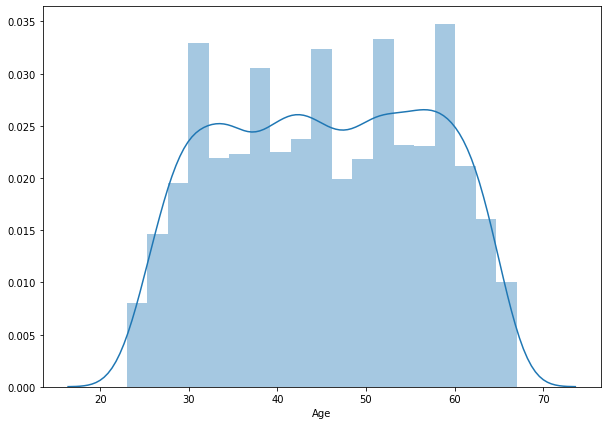

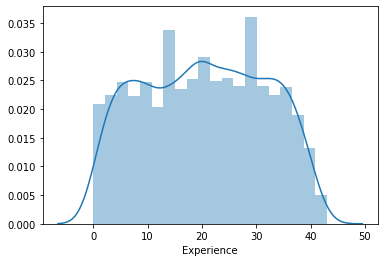

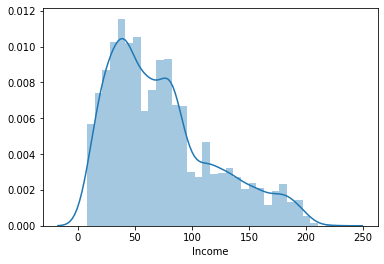

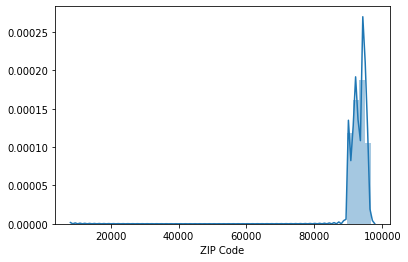

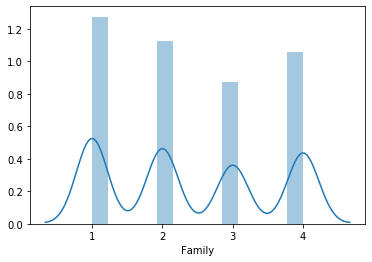

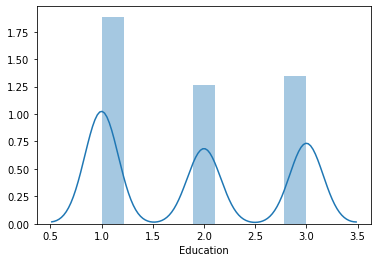

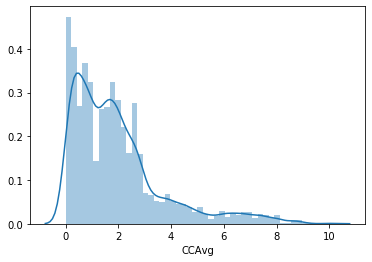

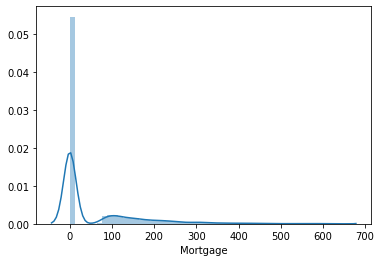

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

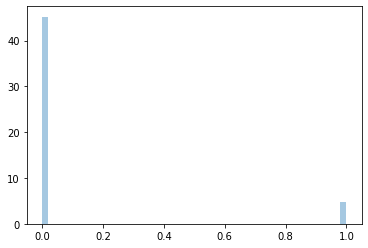

In [32]:
plt.figure(figsize=(10,7))
for i in ['Age','Experience','Income','ZIP Code','Family','Education','CCAvg','Mortgage', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    sns.distplot(df_persloan[i]) 
    plt.show()

In [16]:
#df_persloan_new['Education'] = df_persloan_new['Education'].astype('category')
#df_persloan_new['Personal Loan'] = df_persloan_new['Personal Loan'].astype('category')
#df_persloan_new['Securities Account'] = df_persloan_new['Securities Account'].astype('category')
#df_persloan_new['CD Account'] = df_persloan_new['CD Account'].astype('category')
#df_persloan_new['Online'] = df_persloan_new['Online'].astype('category')
#df_persloan_new['CreditCard'] = df_persloan_new['CreditCard'].astype('category')

    

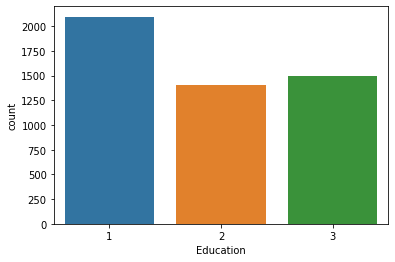

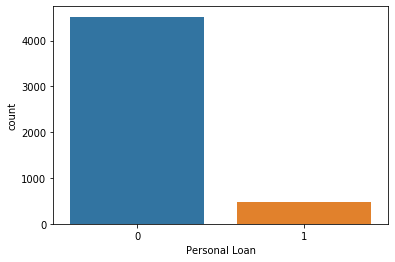

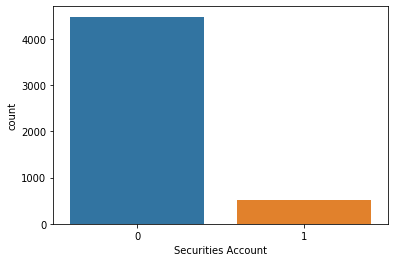

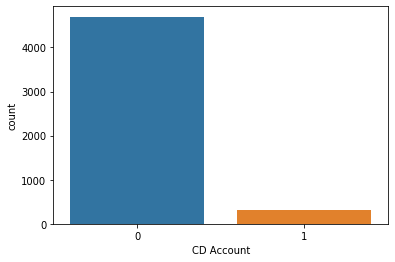

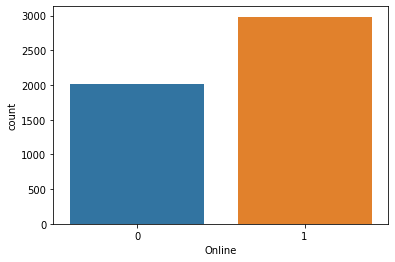

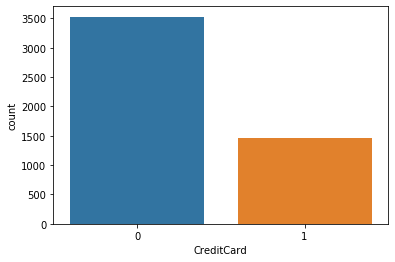

In [18]:

for i in ['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    sns.countplot(df_persloan[i])
    plt.show()

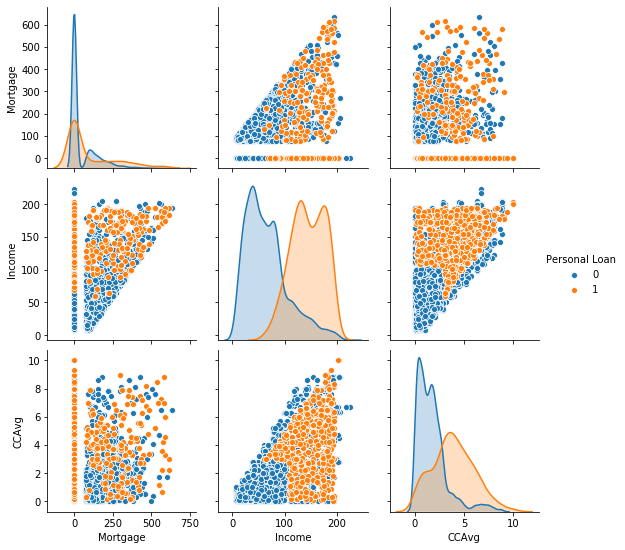

In [20]:
sns.pairplot(df_persloan[['Mortgage','Income','CCAvg','Personal Loan']],hue='Personal Loan')

In [42]:
df_persloan.groupby([ 'Securities Account','CD Account','Online','CreditCard'])['Personal Loan'].value_counts()

Securities Account  CD Account  Online  CreditCard  Personal Loan
0                   0           0       0           0                1168
                                                    1                 116
                                        1           0                 477
                                                    1                  50
                                1       0           0                1689
                                                    1                 165
                                        1           0                 658
                    1           0       1           1                   4
                                1       0           1                  13
                                        1           1                  72
                                                    0                  66
1                   0           0       0           0                 132
                                              

In [22]:
#Experience have negative values, replace them with median


In [23]:
df_persloan["Experience"] = df_persloan["Experience"].mask(df_persloan["Experience"] <0, df_persloan["Experience"].median())

In [24]:
df_persloan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations from Univariate and Bivariate


1) ID: This attribute can be dropped, might not be required for the model

2) Age:Three small peaks can be indicating three values of age would be slightly more in number. Average age is 45 and distribution is in considerable shape.

3) Experience have negative values, it has been replaced by median

4) Income : data is highly left skewed, there are more less income customers

5) ZIP Code: It has sharp peaks probably the data was from certain region, it might not be required for the model

6) Family: It has 4 peaks(4 values) , families with least member is highest in the sample.

7) Eductaion : Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance.

8) Mortage: Data is left skewed telling us that most customer are having least or no mortage

9) Securities Account : Majority of the cutomers don't have security account.

10) CD account: Majority of the cutomers don't have CD

11) Online: Large population of customers use online banking

12) Credit Card: This attribute has less customers using CC in comparison to the CC users.

###  Get Data Model Ready

In [76]:
df_persloan_mdl=df_persloan.drop('ID',axis=1)


In [77]:
df_persloan_mdl.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [37]:
df_persloan_mdl["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [38]:
df_persloan_mdl["Personal Loan"].skew()

2.743606655894059

In [39]:
df_persloan_mdl["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [43]:
# There is imbalance in the data 

In [47]:
df_persloan_mdl.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# No major difference with respect to age, experience,zipcode, Education
# Probability for personal loan is more for higher income, higher family number and higher credit spending

In [50]:
pd.crosstab(df_persloan_mdl['Securities Account'],df_persloan_mdl['Personal Loan'],normalize ='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [51]:
pd.crosstab(df_persloan_mdl['Securities Account'],df_persloan_mdl['Personal Loan'],normalize ='columns')

Personal Loan,0,1
Securities Account,,
0,0.897788,0.875
1,0.102212,0.125


In [52]:
pd.crosstab(df_persloan_mdl['CD Account'],df_persloan_mdl['Personal Loan'],normalize ='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


In [53]:
pd.crosstab(df_persloan_mdl['Online'],df_persloan_mdl['Personal Loan'],normalize ='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [64]:
pd.crosstab(df_persloan_mdl['CreditCard'],df_persloan_mdl['Personal Loan'],normalize ='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


### Model Building

In [78]:
df_persloan_mdl['Education'] =df_persloan_mdl['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
#df_persloan_mdl =pd.get_dummies(df_persloan_mdl, columns=['Education'])
df_persloan_mdl.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [79]:
X=df_persloan_mdl.drop('Personal Loan',axis =1)
Y=df_persloan_mdl['Personal Loan']

In [80]:
X=pd.get_dummies(X,drop_first=True)

In [81]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergrad
0,25,1,49,91107,4,1.6,0,1,0,0,0,0,1
1,45,19,34,90089,3,1.5,0,1,0,0,0,0,1
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.0,0,0,0,0,1,1,0


In [85]:
### Split into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size =0.30,random_state =7)

In [86]:
from sklearn.metrics import confusion_matrix, recall_score,precision_score,f1_score,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=7)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_predict =logreg.predict(X_test)

In [89]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = logreg.predict_proba(X_test)[:,0]

z['Probaility that output is 1'] = logreg.predict_proba(X_test)[:,1]

z['Predicted'] = logreg.predict(X_test)                              

z.head()


,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.990508,0.009492,0
1,0,0.952424,0.047576,0
2,0,0.967553,0.032447,0
3,0,0.964027,0.035973,0
4,0,0.988414,0.011586,0


In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [110]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, logreg.predict(X_test) ), 2 ) )


Total Accuracy :  0.92


In [111]:
pd.DataFrame(data={'columns':X.columns.tolist(),'coef':logreg.coef_[0]})

,columns,coef
0,Age,0.000062
1,Experience,-0.000060
2,Income,0.034557
3,ZIP Code,-0.000063
4,Family,0.000165
5,CCAvg,0.001040
6,Mortgage,0.000903
7,Securities Account,0.000024
8,CD Account,0.000132
9,Online,0.000005


In [105]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Personal Loan", "No Personal Loan"] , yticklabels = ["Personal Loan", "No Personal Loan"] )
    plt.ylabel('Observed label')
    plt.xlabel('Predicted label')
    plt.show()
#draw_cm( z['Actual'], z['Predicted'] )


Training Accuracy 0.9042857142857142

Testing Accuracy 0.9153333333333333

Confusion Matrix


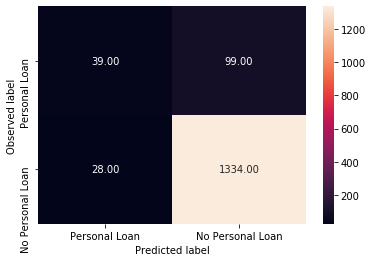

None

Recall 0.2826086956521739

Precision 0.582089552238806

F1 Score 0.38048780487804873

Roc Auc Score 0.6310253463576582


In [103]:
print("Training Accuracy",logreg.score(X_train,y_train))
print()
print("Testing Accuracy",logreg.score(X_test,y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall",recall_score(y_test,y_predict))
print()
print("Precision",precision_score(y_test,y_predict))
print()
print("F1 Score",f1_score(y_test,y_predict))
print()
print("Roc Auc Score",roc_auc_score(y_test,y_predict))




In [112]:
fi =pd.DataFrame()
fi['col'] =X_train.columns
fi['Coeff'] =np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,col,Coeff
2,Income,0.03
0,Age,0.00
1,Experience,0.00
3,ZIP Code,0.00
4,Family,0.00
5,CCAvg,0.00
6,Mortgage,0.00
7,Securities Account,0.00
8,CD Account,0.00
9,Online,0.00


In [ ]:
###Business Insights
# True Positive : Model predicted that 1334 customers shall take personal load and they took it
#False Positive : Model predicted 99 customers will take personal loan but the customer didn't take it, bank didn't loose money
#True Negative : Model Predicted 39 customers will not take personal loan and they didn't
#False Negative : Model Predicted 28 personal loan will not be taken by customer but customer took it
#Bank don't want to loose the customer who want to take the loan, the model should focus on increasing the recall to have less number of false negative
